#                                 __INTRODUCCION__

*  ___Contexto del Proyecto___


*  El presente proyecto se centra en el análisis de un dataset relacionado con el rendimiento y el valor de los jugadores de la mayoria de ligas de futbol del mundo de las  temporadas 2021-2022 y 2022-2023 . El dataset contiene una serie de atributos que describen las características y estadísticas de los jugadores, así como su valor actual en el mercado de transferencias, entre otros.




*  ___Descripción del Dataset___


*  El dataset proporciona información detallada sobre diferentes aspectos de los jugadores, incluyendo su posición en el campo, edad, número de goles y asistencias, tarjetas recibidas, minutos jugados, entre otros. Además, se incluye el valor actual de cada jugador, que refleja su cotización en el mercado y su relevancia económica.

*  ___Objetivo del Análisis___


*  El objetivo principal de este análisis es explorar la relación entre dos variables clave: las apariciones (partidos que disputa un jugador) y su valor actual en el mercado. Entender esta relación nos permitirá obtener insights importantes sobre el impacto de la aparicion, o partido disputado, y  el valor económico de los jugadores, así como identificar posibles estrategias para maximizar su valor en el mercado de transferencias.

*  ___Estructura del Análisis___
*  En este análisis, llevaremos a cabo un enfoque bivariado para explorar la relación entre las aparicione  el valor actual de los jugadores, para buscar la relacion entre partidos disputados y valor del jugador.

*   Trataremos de ver como se relacionan  y si existe alguna influencia entre ambas variables, y al final intentaremos en un heatmap, la influencia de la edad.

*  Primero vamos a realizar un analisis univarido de cada variable.

*  ___Apariciones.___
*  ___Valor actual.___

Realizaremos

*  Eleccion y adecuacion del dataset a nuestra necesidad.

*  Analisis Estadistico:
    *   Media.
    *   Mediana.
    *   Moda.
    *   Medidas de dispersión.

*   Visualizaciones.

*   Se intentara mostrar de forma grafica, lo mencionado previamente.

In [1]:
# importacion de librerias necesarias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# lectura de nuestro df
df=pd.read_csv("./data.csv")
df.head(2)

,Equipo,Nombre,Posicion,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,...,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [4]:
df.columns

Index(['Equipo', 'Nombre', 'Posicion', 'Altura', 'Edad', 'Apariciones',
       'Goles', 'Asistencias', 'Tarjetas Amarillas', '2da Tarjeta Amarillas',
       'Tarjetas Rojas', 'Goles Concedidos', 'Valla Invicta',
       'Minutos Jugados', 'Dias De baja por Lesion',
       'Partidos Perdidos por Lesion', 'Premios', 'Valor Actual',
       'Valor Maximo', 'Posicion Numero', 'Extremo'],
      dtype='object')

In [2]:
# lectura de nuestro df
df=pd.read_csv("./data.csv")

# selecciono lo que necesito
df_proyecto=df[['Posicion','Nombre','Edad','Apariciones','Minutos Jugados','Valor Actual','Equipo']].copy()

# cambiar a edad entero
df_proyecto['Edad'] = df_proyecto['Edad'].astype(int)

# solo quiero que las posiciones de la cancha sean unicas (arqueros, defensas, medios, y delanteros)
df_proyecto['Posicion'] = df['Posicion'].str.extract(r'^\s*([^\s-]+)')

# agrego una columna  para saber la cantidad de minutos posibles ( cantidad de partidos * 90 ( minutos duracion de partido))
df_proyecto['Minutos Posibles']=df_proyecto['Apariciones']*90

# muestro el valor en millones
df_proyecto['Valor Actual']=df_proyecto['Valor Actual'] / 1000000

# agrego columna para saber que porcentaje disputo de ese total posible
df_proyecto['Cantidad disputada en %']=((df_proyecto['Minutos Jugados'] *100) /df_proyecto['Minutos Posibles']).round(0)


In [3]:
columnas = {
    'Posicion': 'La posición en la que juega cada jugador en el equipo.',
    'Nombre': 'El nombre completo de cada jugador.',
    'Edad': 'La edad de los jugadores en años.',
    'Apariciones': 'El número de veces que un jugador ha aparecido en partidos.',
    'Minutos Jugados': 'El total de minutos que un jugador ha jugado en partidos.',
    'Valor Actual': 'El valor actual de mercado de los jugadores en millones de dólares.',
    'Equipo': 'El equipo al que pertenece cada jugador.',
    'Minutos Posibles': 'La cantidad total de minutos posibles basada en el número de apariciones de un jugador (90 minutos por partido).',
    'Cantidad disputada en %': 'El porcentaje de minutos disputados en relación con los minutos posibles, expresado como un número entre 0 y 100.'
}

In [4]:
print(f"Nombre de columna y lo que significa".center(50,"-"))
for columna, valor in columnas.items():
    print(f'{columna}: {valor}')


-------Nombre de columna y lo que significa-------
Posicion: La posición en la que juega cada jugador en el equipo.
Nombre: El nombre completo de cada jugador.
Edad: La edad de los jugadores en años.
Apariciones: El número de veces que un jugador ha aparecido en partidos.
Minutos Jugados: El total de minutos que un jugador ha jugado en partidos.
Valor Actual: El valor actual de mercado de los jugadores en millones de dólares.
Equipo: El equipo al que pertenece cada jugador.
Minutos Posibles: La cantidad total de minutos posibles basada en el número de apariciones de un jugador (90 minutos por partido).
Cantidad disputada en %: El porcentaje de minutos disputados en relación con los minutos posibles, expresado como un número entre 0 y 100.


In [5]:
# funcion para mostrar datos estadisticos
def calcular_estadisticas(df, columna):
    
    # Medidas de Tendencia Central
    media = df[columna].mean()
    mediana = df[columna].median()
    moda = df[columna].mode()[0]

    # Medidas de Dispersión 
    rango = df[columna].max() - df[columna].min()
    desviacion_estandar = df[columna].std()
    cuartiles = df[columna].quantile([0.25, 0.5, 0.75]).to_list()

    print(f"Medidas de Tendencia Central para '{columna}':".center(50,"-"))
    print(f"Media: {media.round(2)}".center(50," "))
    print(f"Mediana: {mediana.round(2)}".center(50," "))
    print(f"Moda: {moda}".center(50," "))
    print("".center(50,"-"))
    print("".center(50,"*"))
    print(f"Medidas de Dispersión para '{columna}':".center(50,"-"))
    print(f"Rango: {rango}".center(50," "))
    print(f"Desviación Estándar: {desviacion_estandar.round(2)}".center(50," "))
    print(f"Cuartiles: {cuartiles}".center(50," "))
    print("".center(50,"-"))

# ___Datos Estadisticos___

In [6]:
calcular_estadisticas(df_proyecto, 'Apariciones')
calcular_estadisticas(df_proyecto, 'Valor Actual')


-Medidas de Tendencia Central para 'Apariciones':-
                   Media: 36.41                   
                  Mediana: 35.0                   
                     Moda: 0                      
--------------------------------------------------
**************************************************
----Medidas de Dispersión para 'Apariciones':-----
                    Rango: 107                    
            Desviación Estándar: 26.53            
          Cuartiles: [12.0, 35.0, 59.0]           
--------------------------------------------------
Medidas de Tendencia Central para 'Valor Actual':-
                   Media: 3.62                    
                   Mediana: 0.8                   
                    Moda: 1.0                     
--------------------------------------------------
**************************************************
----Medidas de Dispersión para 'Valor Actual':----
                   Rango: 180.0                   
             Desviación Estánda

#  ___CORRELACION Y COVARIANZA___  

In [7]:
# Calcular la correlación entre Apariciones y Valor Actual 
correlation = df_proyecto['Apariciones'].corr(df_proyecto['Valor Actual'])
print(f"Correlación entre Apariciones y Valor Actual: {correlation}")

# Calcular la covarianza ( como cambian las dos variable, pero juntas)
covariance = df_proyecto['Apariciones'].cov(df_proyecto['Valor Actual'])
print(f"Covarianza entre Edad y Valor Actual: {covariance}")

Correlación entre Edad y Valor Actual: 0.4196560172857307
Covarianza entre Edad y Valor Actual: 101.25030605296568


#  ___Visualizaciones___ 

In [8]:
# funcion para crear histograma
def grafico_histograma(df, columna, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.histplot(df[columna], bins=15, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel(f'Frecuencia de {columna}')
    plt.show()

# funcion para crear boxplot
def grafico_boxplot(df, columna, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)
    plt.show()

# funcion para crear graficos de Quartiles   
def grafico_cuartiles(df, columna,figsize=(10, 6)):
    # Calcular los cuartiles
    quartiles = df[columna].quantile([0.25, 0.5, 0.75])

    # Crear el gráfico de barras para los cuartiles
    plt.bar(['Q1', 'Q2 (Mediana)', 'Q3'], quartiles.values, color=['red', 'green', 'blue'])
    plt.title(f'Cuartiles para {columna}')
    plt.xlabel('Cuartiles')
    plt.ylabel(columna)
    plt.show()

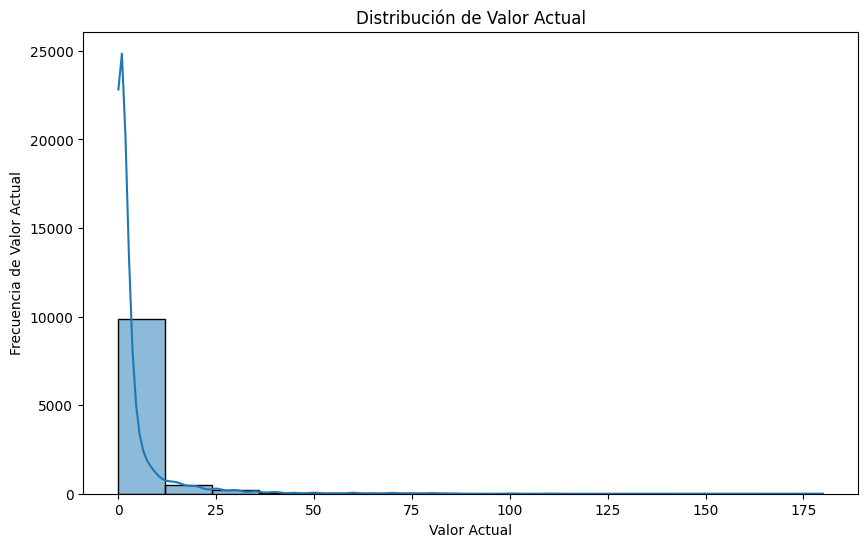

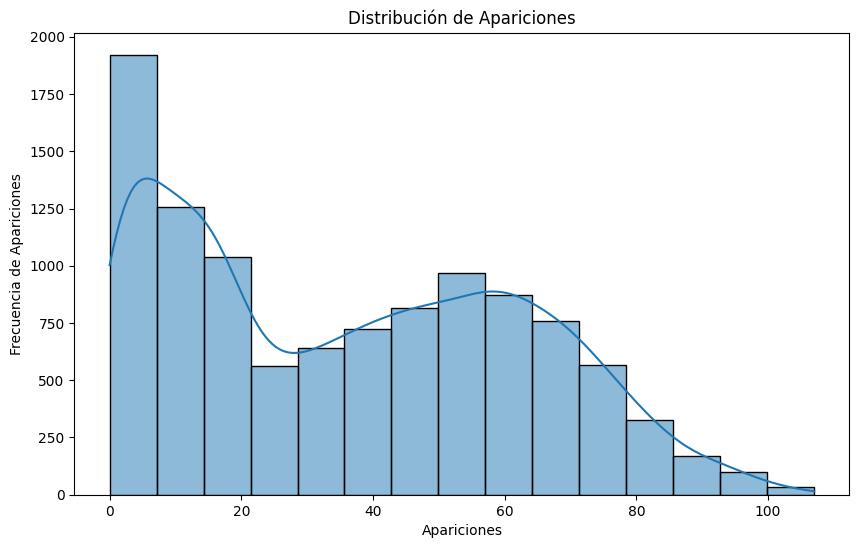

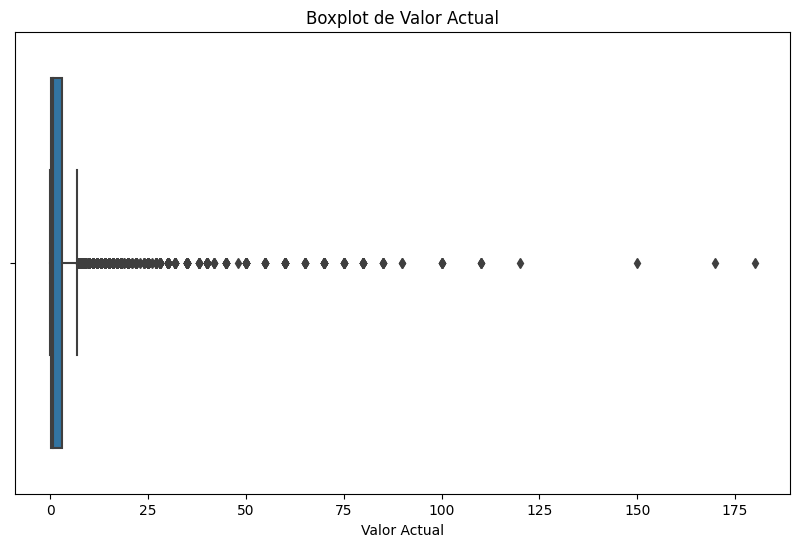

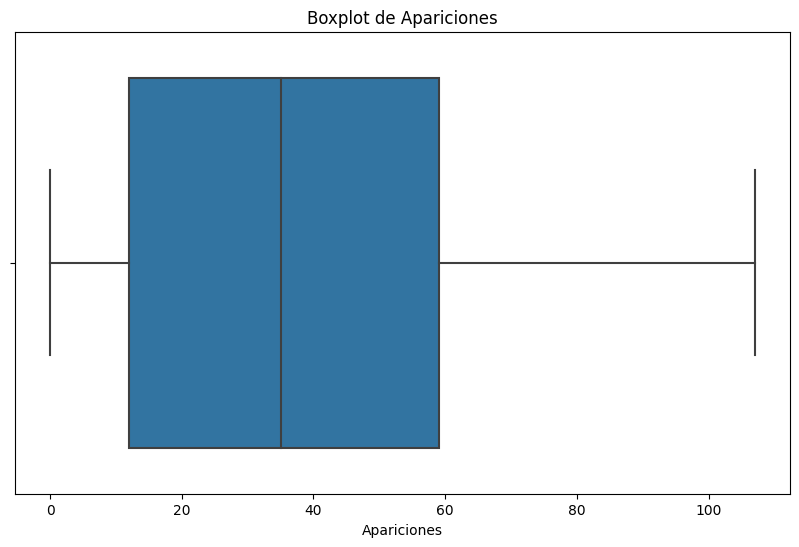

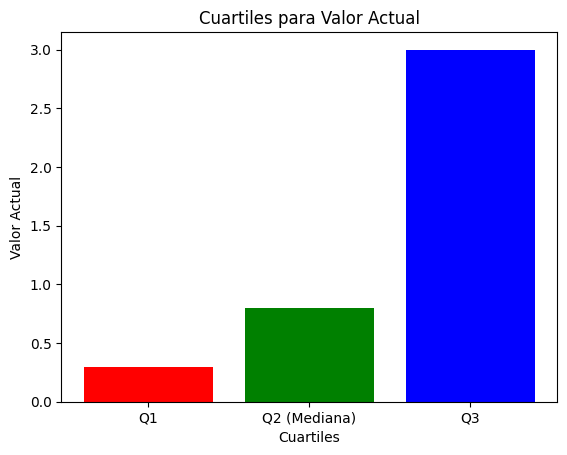

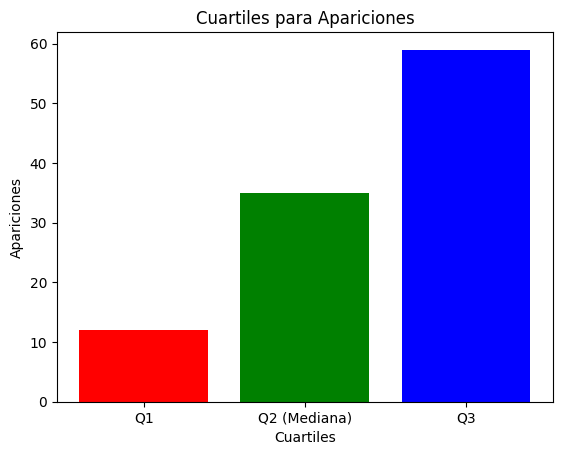

In [9]:
# creacion de graficos pasando parametros
grafico_histograma(df_proyecto, 'Valor Actual')
grafico_histograma(df_proyecto, 'Apariciones')

grafico_boxplot(df_proyecto, 'Valor Actual')
grafico_boxplot(df_proyecto, 'Apariciones')


grafico_cuartiles(df_proyecto, 'Valor Actual')
grafico_cuartiles(df_proyecto, 'Apariciones')

#   ___Visualizaciones:___


*   ___Boxplot de "Valor Actual" por categorías de "Edad": Para ver la distribución del valor actual en diferentes grupos de 
cantidad de apariciones.___


*   ___Heatmap: Para visualizar la correlación entre las variables, cantidad de apariciones, y valor actual, tambien vamos a agregar un factor, sin perder de nocion las dos variables, que trabajamos, la edad, para ver si el coficiente de correlacion tiene cambios.___

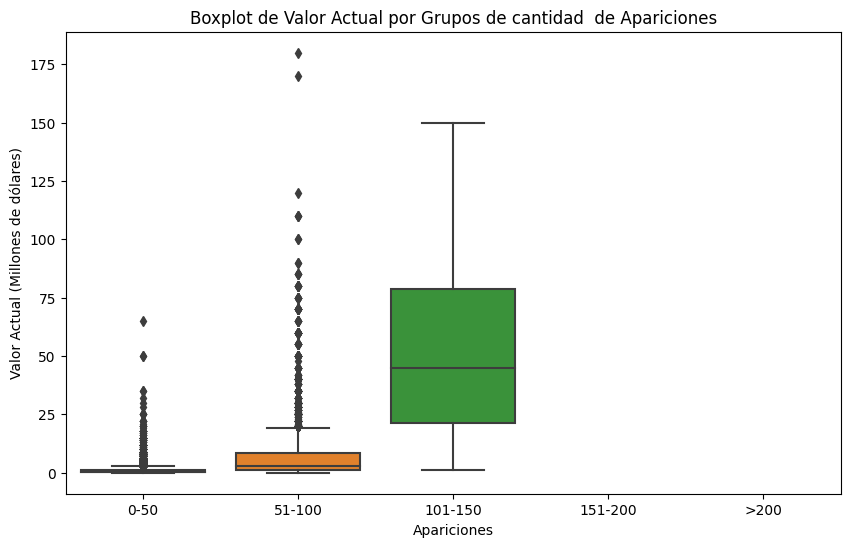

In [10]:

# Definir los límites y etiquetas de los grupos
bins_apariciones = [0, 50, 100, 150, 200, float('inf')]  
labels_apariciones = ['0-50', '51-100', '101-150', '151-200', '>200'] 

# Agrupar las apariciones en los grupos definidos
df_proyecto['Apariciones_Categoria'] = pd.cut(df_proyecto['Apariciones'], bins=bins_apariciones, labels=labels_apariciones)

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Apariciones_Categoria', y='Valor Actual', data=df_proyecto)
plt.title('Boxplot de Valor Actual por Grupos de cantidad  de Apariciones')
plt.xlabel('Apariciones')
plt.ylabel('Valor Actual (Millones de dólares)')
plt.show()

#   ___Matriz de correlacion entre Apariciones y Valor Actual.___

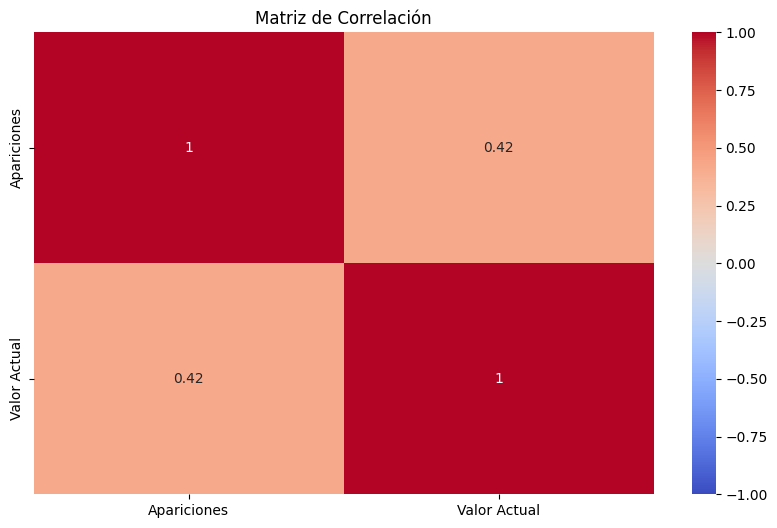

In [11]:
# matriz de correlacion general
plt.figure(figsize=(10, 6))
correlation_matrix = df_proyecto[['Apariciones','Valor Actual']].corr()              
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

* ___Vamos a agregar la edad, para ver si varia la correlacion.___

In [12]:
# funcion para crear el heatmap
def heatmap_por_edad(df, edades, columnas):
    for edad in edades:
        # recibida la edad a analizar, vamos a haber la correlacion 
        df_filtrado = df[df['Edad'] == edad]
       
        
        plt.figure(figsize=(10, 4))
        ax = sns.heatmap(df_filtrado[columnas].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

        plt.title(f'Matriz de Correlación para la edad {edad}')
        plt.show()

# ___Headmap por Edades___
*   ___Vamos a graficar en edades, claves:___
    * Menos de 20 años.
    * Edad de 20.
    * Edad de 25.
    * Edad de 30.
    * Edad de 35.
    * Edad de 40.

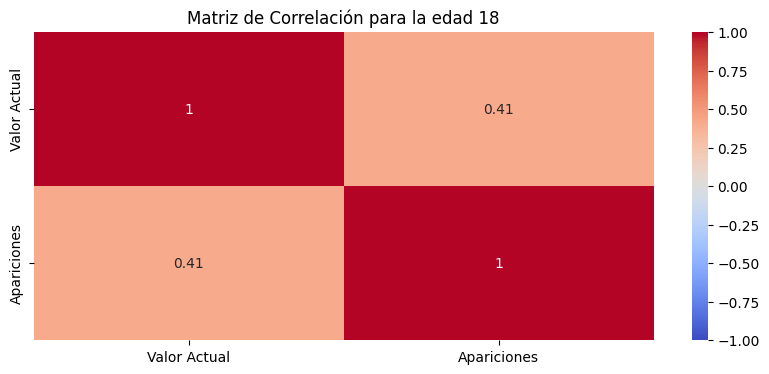

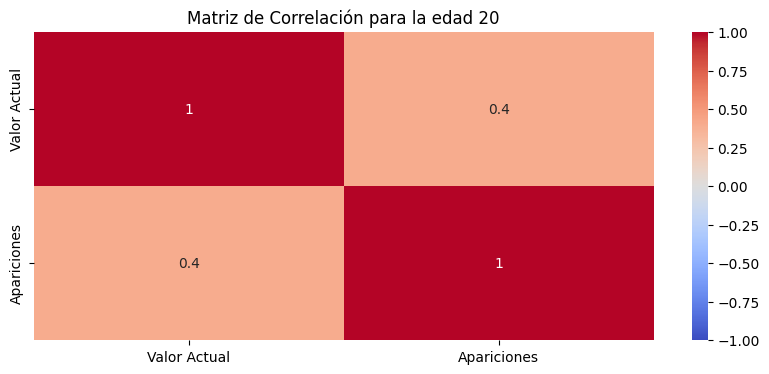

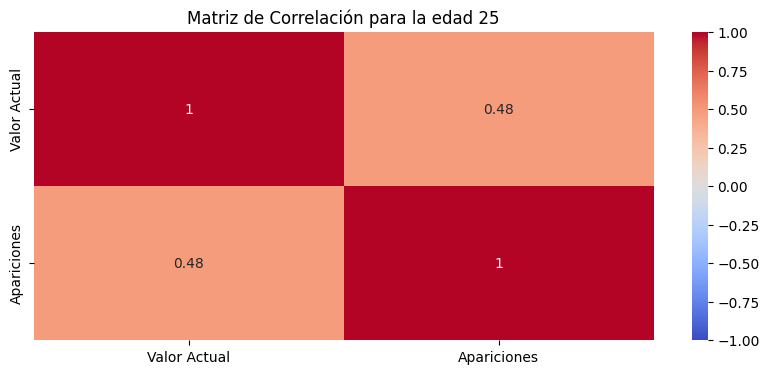

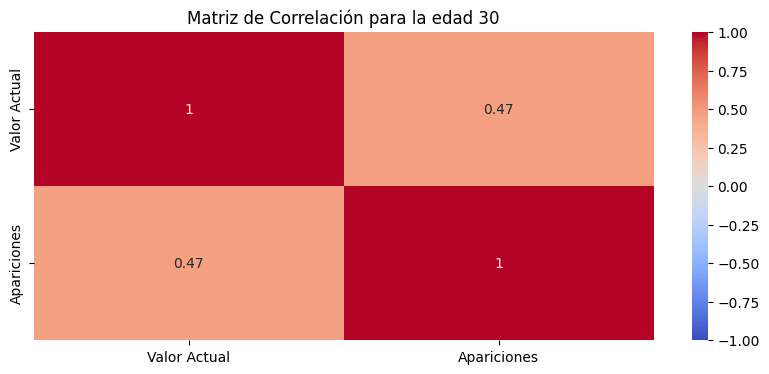

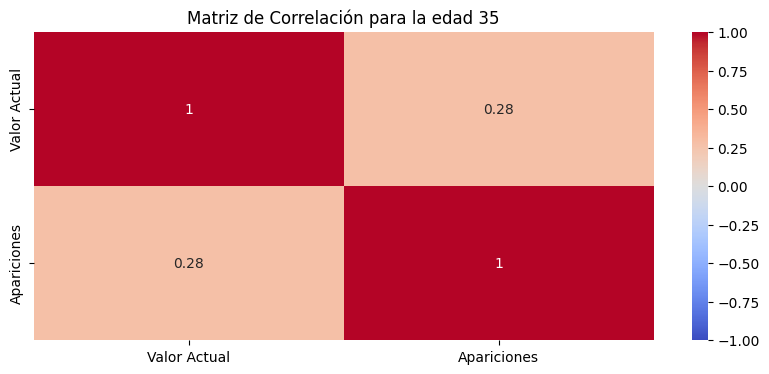

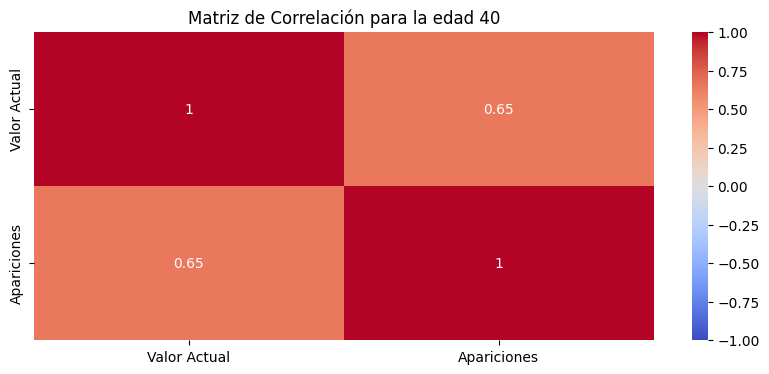

In [13]:
# invocando funcion, y pasando las edades a analizar
heatmap_por_edad(df_proyecto, [18, 20, 25, 30,35,40], ['Valor Actual','Apariciones'])

#                  ___Conclusiones Finales___

[Haga doble Click aqui, para encontrar un informe, sobre el notebook presentado, y conclusiones pertinentes](Proyecto_DS.pdf)